In [23]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("climate-ds.csv")

In [25]:
df.head(10)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,Albania,Maize,1991,1485,121.0,15.36,29068
7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [27]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [28]:
df["Item"].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [29]:
df.drop(['Year','pesticides_tonnes'], axis=1, inplace=True)


In [30]:
df.describe()

,average_rain_fall_mm_per_year,avg_temp,hg/ha_yield
count,28242.00000,28242.000000,28242.000000
mean,1149.05598,20.542627,77053.332094
std,709.81215,6.312051,84956.612897
min,51.00000,1.300000,50.000000
25%,593.00000,16.702500,19919.250000
50%,1083.00000,21.510000,38295.000000
75%,1668.00000,26.000000,104676.750000
max,3240.00000,30.650000,501412.000000


In [31]:
df.head(10)

,Area,Item,average_rain_fall_mm_per_year,avg_temp,hg/ha_yield
0,Albania,Maize,1485,16.37,36613
1,Albania,Potatoes,1485,16.37,66667
2,Albania,"Rice, paddy",1485,16.37,23333
3,Albania,Sorghum,1485,16.37,12500
4,Albania,Soybeans,1485,16.37,7000
5,Albania,Wheat,1485,16.37,30197
6,Albania,Maize,1485,15.36,29068
7,Albania,Potatoes,1485,15.36,77818
8,Albania,"Rice, paddy",1485,15.36,28538
9,Albania,Sorghum,1485,15.36,6667


In [32]:
nan_values = df.isna().sum()
print(nan_values)

Area                             0
Item                             0
average_rain_fall_mm_per_year    0
avg_temp                         0
hg/ha_yield                      0
dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder

# Create and fit LabelEncoders
le_item = LabelEncoder()
le_area = LabelEncoder()

df['Item'] = le_item.fit_transform(df['Item'])
df['Area'] = le_area.fit_transform(df['Area'])
X = df.loc[:, df.columns != 'hg/ha_yield']
Y = df['hg/ha_yield']

X.head(10)

,Area,Item,average_rain_fall_mm_per_year,avg_temp
0,0,1,1485,16.37
1,0,3,1485,16.37
2,0,4,1485,16.37
3,0,5,1485,16.37
4,0,6,1485,16.37
5,0,8,1485,16.37
6,0,1,1485,15.36
7,0,3,1485,15.36
8,0,4,1485,15.36
9,0,5,1485,15.36


In [34]:
# Check for duplicate rows
duplicate_rows = df.duplicated()
print(duplicate_rows.sum())

2330


In [35]:
df_no_duplicates = df.drop_duplicates()

In [36]:
nan_values = df.isna().sum()
print(nan_values)

Area                             0
Item                             0
average_rain_fall_mm_per_year    0
avg_temp                         0
hg/ha_yield                      0
dtype: int64


In [37]:
print(df.dtypes)


Area                               int32
Item                               int32
average_rain_fall_mm_per_year      int64
avg_temp                         float64
hg/ha_yield                        int64
dtype: object


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield']] = scaler.fit_transform(df[['average_rain_fall_mm_per_year', 'avg_temp', 'hg/ha_yield']])


In [39]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [40]:
# Create and train the Decision Tree Regressor
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, predictions)
print(f'Random Forest Regressor: Mean Squared Error = {mse}')


Random Forest Regressor: Mean Squared Error = 549280062.6645429


In [41]:
print('Model score: {}'.format(random_forest_model.score(X_test, Y_test)))

# Create a DataFrame with actual and predicted values
y_test_df = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': random_forest_model.predict(X_test)})

# Display the first 10 rows
print(y_test_df.head(10))


Model score: 0.9242755855419501
   Actual      Predicted
0   69220   70321.200000
1   20000   24477.060000
2   51206   53243.560000
3  166986  156748.076667
4   56319   54456.630000
5   26163   29644.555000
6   30708   31754.815833
7  109771  109644.690000
8  241650  218355.940000
9   47500   44476.855000


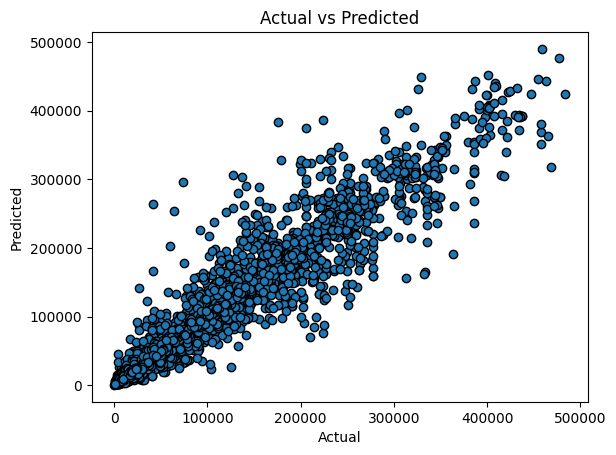

In [42]:
# Scatter plot
plt.scatter(y_test_df['Actual'], y_test_df['Predicted'], edgecolors=(0, 0, 0))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted")

# Display the plot
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score

# Assuming 'random_forest_model' is your Random Forest Regressor model
scores = cross_val_score(random_forest_model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = -scores.mean()
std_score = scores.std()

print(f'Mean Cross-Validation Score: {mean_score}')
print(f'Standard Deviation of Cross-Validation Scores: {std_score}')


Mean Cross-Validation Score: 3043751464.185698
Standard Deviation of Cross-Validation Scores: 1023359953.4021206


In [44]:
joblib.dump(random_forest_model, 'model.joblib')
# During training, after fitting the LabelEncoders
joblib.dump(le_item.classes_, 'le_item_classes.joblib')
joblib.dump(le_area.classes_, 'le_area_classes.joblib')

['le_area_classes.joblib']